In [1]:
# Python libraries
import os
import sys
import pandas as pd # for data manipulation
import numpy as np # for data manipulation
import keras
import matplotlib.pyplot as plt

# To enable LaTeX and select a font
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": "Helvetica",
})

# Import custom functions from other notebooks
sys.path.append("myfun/")
from ipynb.fs.full.myfun_density import *

2024-02-21 13:59:08.469951: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-21 13:59:08.469981: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-21 13:59:08.470796: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-21 13:59:08.476530: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-02-21 13:59:09.236657: W tensorflow/compiler/tf2

# Traffic flow: the LWR model

In [2]:
## Params
Nx = 100
Nt = 201
T = .5

rho_l = 0.4
rho_r = 0.8
rho_out = 0

toll = 1e-3

In [3]:
# Space - linearly distributed
dx = 1/int(Nx/3)
a = np.linspace(-1,0,int(Nx/3))
b = np.linspace(0+dx/2, 1, Nx-int(Nx/3))
xspan = np.concatenate([a, b])

# Time
tspan = np.linspace(0,T,Nt)
tspan_rounded = list(np.round(tspan,2))

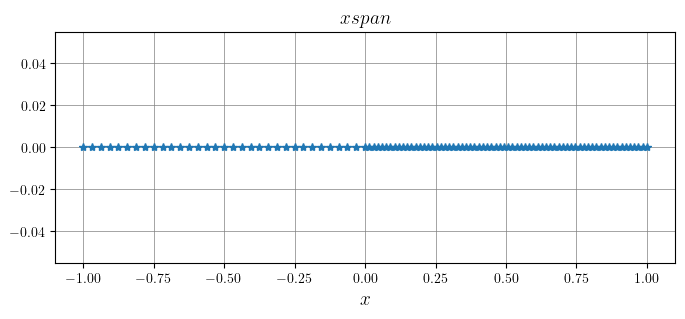

In [4]:
# Initialize the fig
fig, ax = plt.subplots(1,1,figsize=(8,3))

ax.plot(xspan,xspan*0,marker='*', ls='None')

ax.set_xlabel(r"$x$",fontsize=14)
ax.set_title(fr"$xspan$",fontsize=14)
ax.grid(color='grey', linestyle='-', linewidth=0.5)
    
plt.show()

In [5]:
## Flux
#Traffic Jam
f = lambda rho: rho*(1-rho)  
fprime = lambda rho: 1-2*rho
fprime_inv = lambda rho: .5*(1-rho)

# params
toll = 1e-3
flux = [f, fprime, fprime_inv]
speed_shock = (f(rho_r) - f(rho_l))/(rho_r - rho_l)

## Plot

In [6]:
t_plot = 0.4
idx_t_plot = tspan_rounded.index(t_plot)

trange = 0, T/2, T
idx = [tspan_rounded.index(t) for t in trange]

In [7]:
N = 50
xlims = [-1,1]
drho = 0.2

# per il plot
xlim1, xlim2 = -1.25, 1.75
xx = np.linspace(xlim1,xlim2,100)

In [8]:
# # Characteristics
chars, (chars1, chars2, chars3) = chars_2s(xlims, N, tspan, rho_l, rho_r, rho_out, flux, drho = 0.1)

# Cars trajs
ct, (ct1, ct2, ct3) = cars_trajs_2s(xlims, N, tspan, rho_l, rho_r, rho_out, flux, drho)

# Densities
idx_t_plot, (cp_ttt, d_ttt), (cp_ttt1, d1_ttt), (cp_ttt2, d2_ttt) = rho_2s(xlims, N, tspan,
                                                                        rho_l, rho_r, rho_out,
                                                                        flux, t_plot, drho)

### Plot 1

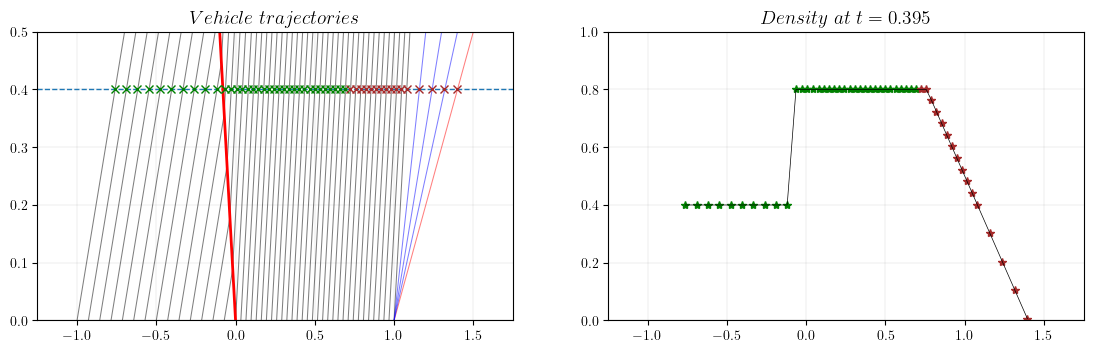

In [9]:
# Initialize the fig
nrow, ncol = 1, 2
width, height = 9,5 # single subplot
fig, ax = plt.subplots(nrow,ncol,figsize=(width*ncol*.75,height*.75))

# AX 0: Vehicle trajs
ax[0].plot(ct1, tspan, c='k', alpha=0.5, ls='-', lw = .75)
ax[0].plot(ct2, tspan, c='r', alpha=0.5, ls='-', lw = .75)
ax[0].plot(ct3, tspan, c='b', alpha=0.5, ls='-', lw = .75)
# ax[0].plot(ct, tspan, c='k', alpha=0.5, ls='-', lw = .75) tutte assieme
ax[0].plot(xx,t_plot*np.ones(len(xx)), ls='--', lw = 1)
ax[0].plot(speed_shock*tspan, tspan, c='r', ls='-', lw = 2)

# vehicles
ax[0].plot(cp_ttt1, np.ones(len(cp_ttt1))*t_plot, c='g', marker='x', ls='None')
ax[0].plot(cp_ttt2, np.ones(len(cp_ttt2))*t_plot, c='brown', marker='x', ls='None')

ax[0].set_xlim([xlim1, xlim2])
ax[0].set_ylim([0, T])  
ax[0].grid(color='grey', linestyle='-', linewidth=0.1)
ax[0].set_title(fr"$Vehicle\ trajectories$",fontsize=14)

# AX 1: Density
ax[1].plot(cp_ttt1, d1_ttt, c='g', ls = 'None', marker= '*')
ax[1].plot(cp_ttt2, d2_ttt, c='brown', ls = 'None', marker= '*')
ax[1].plot(cp_ttt, d_ttt, c='k', ls = '-', lw = .5)

ax[1].set_xlim([xlim1, xlim2])
ax[1].set_ylim([0, 1])
ax[1].grid(color='grey', linestyle='-', linewidth=0.1)
ax[1].set_title(fr"$Density\ at\ t={tspan[idx_t_plot]}$",fontsize=14)

plt.show()

### Simplified plot

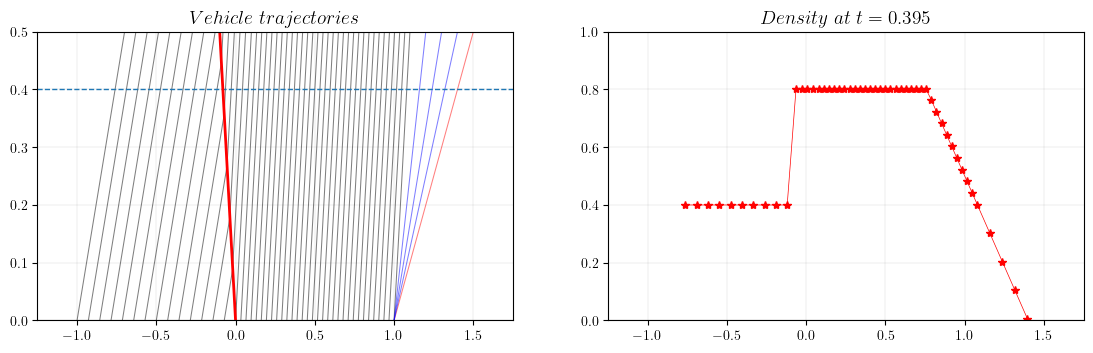

In [10]:
# Initialize the fig
nrow, ncol = 1, 2
width, height = 9,5 # single subplot
fig, ax = plt.subplots(nrow,ncol,figsize=(width*ncol*.75,height*.75))

# AX 0: Vehicle trajs
ax[0].plot(ct1, tspan, c='k', alpha=0.5, ls='-', lw = .75)
ax[0].plot(ct2, tspan, c='r', alpha=0.5, ls='-', lw = .75)
ax[0].plot(ct3, tspan, c='b', alpha=0.5, ls='-', lw = .75)
# ax[0].plot(ct, tspan, c='k', alpha=0.5, ls='-', lw = .75) tutte assieme
ax[0].plot(xx,t_plot*np.ones(len(xx)), ls='--', lw = 1)
ax[0].plot(speed_shock*tspan, tspan, c='r', ls='-', lw = 2)

ax[0].set_xlim([xlim1, xlim2])
ax[0].set_ylim([0, T])  
ax[0].grid(color='grey', linestyle='-', linewidth=0.1)
ax[0].set_title(fr"$Vehicle\ trajectories$",fontsize=14)

# AX 1: Density
ax[1].plot(cp_ttt, d_ttt, c='r', ls = '-', lw = .5, marker='*')

ax[1].set_xlim([xlim1, xlim2])
ax[1].set_ylim([0, 1])
ax[1].grid(color='grey', linestyle='-', linewidth=0.1)
ax[1].set_title(fr"$Density\ at\ t={tspan[idx_t_plot]}$",fontsize=14)

plt.show()

### Only Density

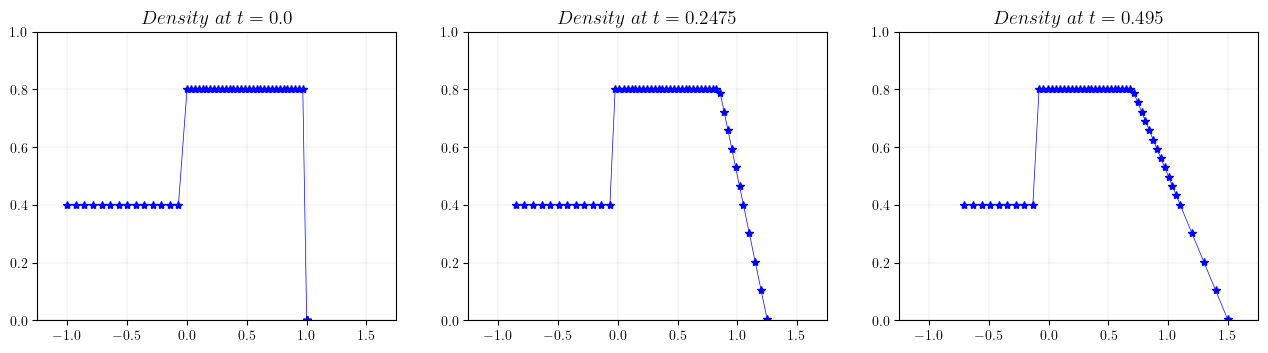

In [11]:
# Initialize the fig
nrow, ncol = 1, 3
width, height = 7, 5
fig, axes = plt.subplots(nrow,ncol,figsize=(width*ncol*.75,height*.75))

for ttt, ax in zip(trange, axes.ravel()):

    # Method 2
    idx_ttt, (cp_ttt, d_ttt), (cp_ttt1, d1_ttt), (cp_ttt2, d2_ttt) = rho_2s(xlims, N, tspan,
                                                                            rho_l, rho_r, rho_out,
                                                                            flux, ttt, drho)
    ax.plot(cp_ttt, d_ttt, c='b', ls = '-', lw = .5, marker='*')

    ax.set_xlim([xlim1, xlim2])
    ax.set_ylim([0, 1])
    ax.grid(color='grey', linestyle='-', linewidth=0.1)
    ax.set_title(fr"$Density\ at\ t={tspan[idx_ttt]}$",fontsize=14)

plt.show()

### General overview

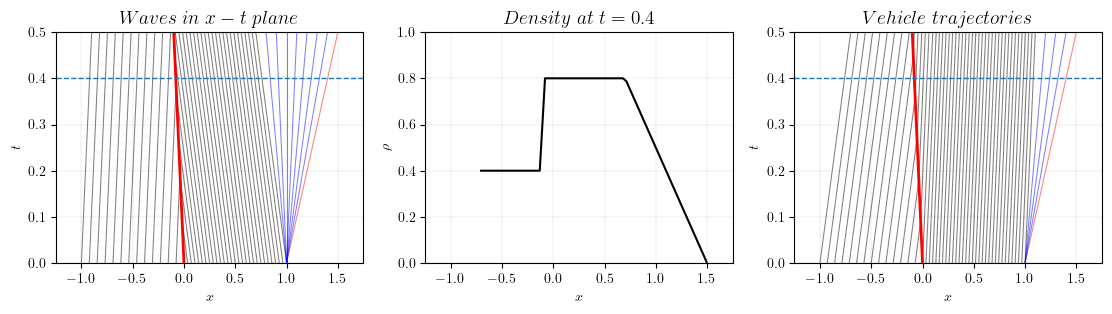

In [13]:
# Initialize the fig
nrow, ncol = 1, 3
width, height = 6,4 # single subplot
fig, ax = plt.subplots(nrow,ncol,figsize=(width*ncol*.75,height*.75))

# AX 0: waves in x-t plane
ax[0].plot(chars1, tspan, c='k', alpha=0.5, ls='-', lw = .75)
ax[0].plot(chars2, tspan, c='r', alpha=0.5, ls='-', lw = .75)
ax[0].plot(chars3, tspan, c='b', alpha=0.5, ls='-', lw = .75)
# ax[0].plot(chars, tspan, c='k', alpha=0.5, ls='-', lw = .75)
ax[0].plot(speed_shock*tspan, tspan, c='red', ls='-', lw = 2)
ax[0].plot(xx,t_plot*np.ones(len(xx)), ls='--', lw = 1)


ax[0].set_xlim([xlim1,xlim2])
ax[0].set_ylim([0, T])
ax[0].set_xlabel(r"$x$",fontsize=10)
ax[0].set_ylabel(r"$t$",fontsize=10)
ax[0].grid(color='grey', linestyle='-', linewidth=0.1)
ax[0].set_title(fr"$Waves\ in\ x-t\ plane$",fontsize=14)


# # AX 1: Density
ax[1].plot(cp_ttt,d_ttt, c='k', ls = '-', lw = 1.5)

ax[1].set_xlim([xlim1,xlim2])
ax[1].set_ylim([0, 1])
ax[1].set_xlabel(r"$x$",fontsize=10)
ax[1].set_ylabel(r"$\rho$",fontsize=10)
ax[1].grid(color='grey', linestyle='-', linewidth=0.1)
ax[1].set_title(fr"$Density\ at\ t={t_plot}$",fontsize=14)


# AX 2: Vehicle trajs
ax[2].plot(ct1, tspan, c='k', alpha=0.5, ls='-', lw = .75)
ax[2].plot(ct2, tspan, c='r', alpha=0.5, ls='-', lw = .75)
ax[2].plot(ct3, tspan, c='b', alpha=0.5, ls='-', lw = .75)
# ax[2].plot(ct, tspan, c='k', alpha=0.5, ls='-', lw = .5)

ax[2].plot(speed_shock*tspan, tspan, c='r', ls='-', lw = 2)
ax[2].plot(xx,t_plot*np.ones(len(xx)), ls='--', lw = 1)

ax[2].set_xlim([xlim1,xlim2])
ax[2].set_ylim([0, T])
ax[2].set_xlabel(r"$x$",fontsize=10)
ax[2].set_ylabel(r"$t$",fontsize=10)
ax[2].grid(color='grey', linestyle='-', linewidth=0.1)
ax[2].set_title(fr"$Vehicle\ trajectories$",fontsize=14)


plt.show()